## Data Visualization | Canada Immigration Data 1980 -2013 | AREA PLOTS, HISTOGRAMS AND BAR CHARTS

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme()

In [2]:
df = pd.read_csv("02 Canada Immigration Clean Data.csv")
print("Data read into pandas dataframe")

Data read into pandas dataframe


In [3]:
df.head()

,Unnamed: 0,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [4]:
df.drop("Unnamed: 0", axis =1, inplace =True)
df.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [5]:
df.set_index("Country", inplace =True)
df.head(2)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699


Since we converted the years to string, let's declare a variable that will allow us to easily call upon the full range of years:


In [ ]:
years = list(map(str, range(1980, 2014)))
years

## Area Plots


In the last module, we created a line plot that visualized the top 5 countries that contribued the most immigrants to Canada from 1980 to 2013. With a little modification to the code, we can visualize this plot as a cumulative plot, also knows as a **Stacked Line Plot** or **Area plot**.

In [9]:
df.sort_values(by ='Total', axis =0, ascending =False, inplace =True)
df_top_6 = df.head(6)
df_top_6 = df_top_6[years].transpose()

df_top_6.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan,United States of America
1980,8880,5123,22045,6051,978,9378
1981,8670,6682,24796,5921,972,10030
1982,8147,3308,20620,5249,1201,9074
1983,7338,1863,10015,4562,900,7100
1984,5704,1527,10170,3801,668,6661


`Area plots are stacked by default.` And to produce a stacked area plot, each column must be either all positive or all negative values (any `NaN`, i.e. not a number, values will default to 0). To produce an unstacked plot, set parameter `stacked` to value `False`.


The unstacked plot has a default transparency (alpha value) at 0.5. We can modify this value by passing in the `alpha` parameter.


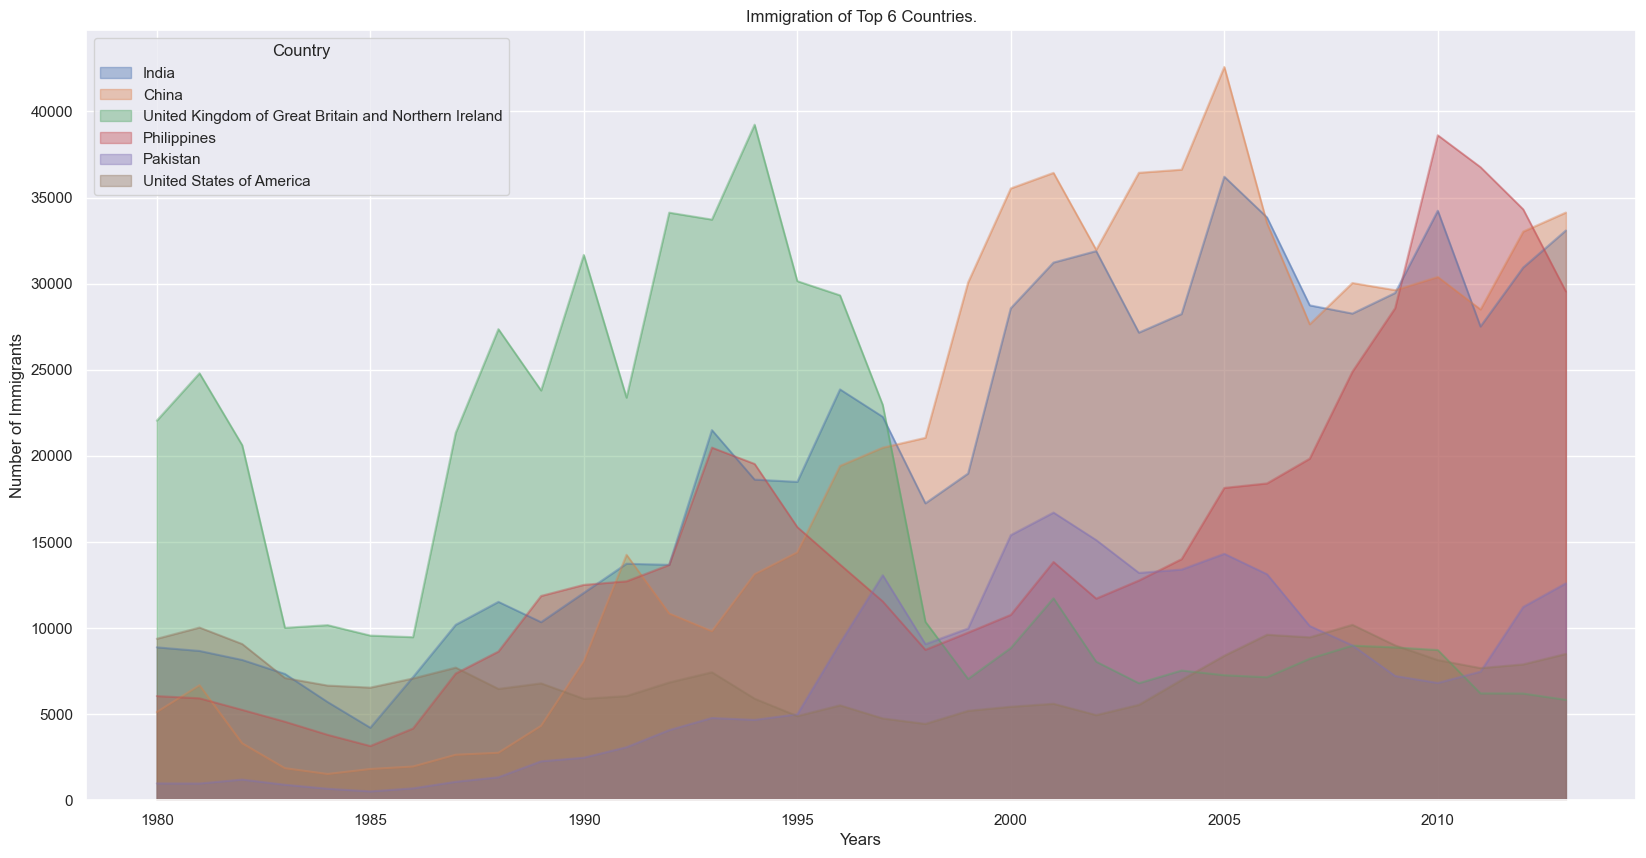

In [10]:
# let's change the index values of df_top_6 to type integer for plotting
df_top_6.index =df_top_6.index.map(int)
df_top_6.plot(kind ='area',
              stacked =False,
              alpha =0.4, #to manage the transparency
              figsize =(20,10))

plt.title("Immigration of Top 6 Countries.")
plt.ylabel("Number of Immigrants")
plt.xlabel("Years")

plt.show()

### Two types of plotting

As we discussed in the video lectures, there are two styles/options of plotting with `matplotlib`， plotting using the Artist layer and plotting using the scripting layer.

**Option 1: Scripting layer (procedural method) - using matplotlib.pyplot as 'plt'**

You can use `plt` i.e. `matplotlib.pyplot` and add more elements by calling different methods procedurally; for example, `plt.title(...)` to add title or `plt.xlabel(...)` to add label to the x-axis.

**Option 2: Artist layer (Object oriented method) - using an `Axes` instance from Matplotlib (preferred)**

You can use an `Axes` instance of your current plot and store it in a variable (eg. `ax`). You can add more elements by calling methods with a little change in syntax (by adding "`set_`" to the previous methods). For example, use `ax.set_title()` instead of `plt.title()` to add title,  or `ax.set_xlabel()` instead of `plt.xlabel()` to add label to the x-axis.

This option sometimes is more transparent and flexible to use for advanced plots (in particular when having multiple plots).

Text(0.5, 0, 'Years')

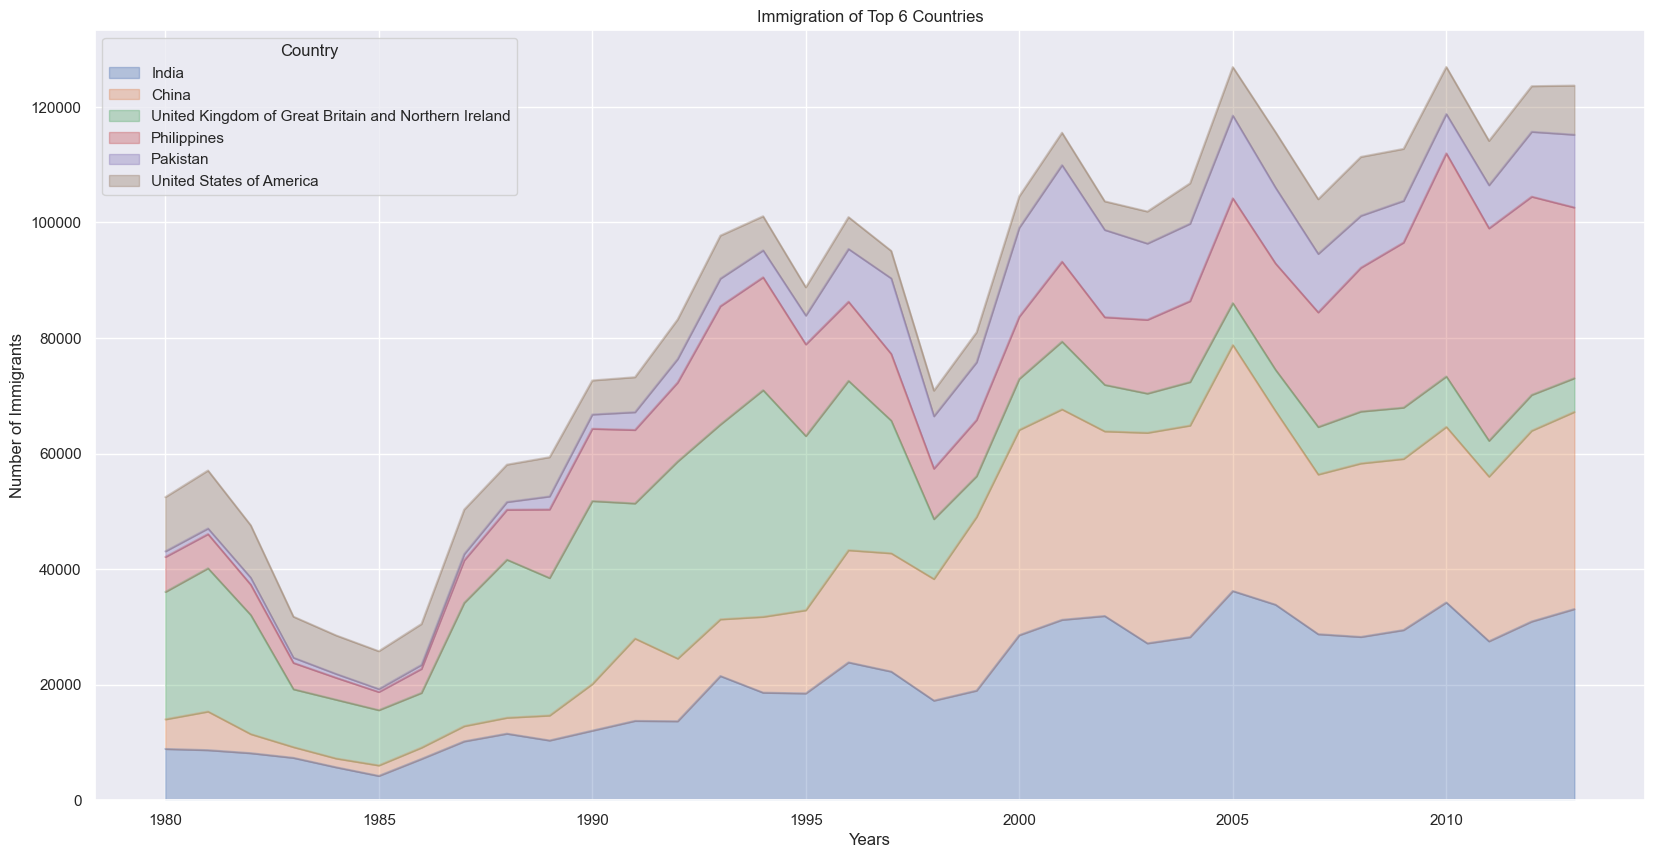

In [11]:
ax = df_top_6.plot(kind ='area', alpha =0.35, figsize =(20,10))

ax.set_title("Immigration of Top 6 Countries")
ax.set_ylabel("Number of Immigrants")
ax.set_xlabel("Years")

Now Let's Use the artist layer to create a stacked area plot of the 5 countries that contributed the least to immigration to Canada **from** 1980 to 2013.


In [12]:
df.sort_values(by ='Total', axis=0, ascending =False, inplace =True)
df_last_5 = df.tail()
df_last_5 = df_last_5[years].transpose()
df_last_5.head()

Country,San Marino,New Caledonia,Marshall Islands,Western Sahara,Palau
1980,1,0,0,0,0
1981,0,0,0,0,0
1982,0,0,0,0,0
1983,0,0,0,0,0
1984,0,0,0,0,0


Text(0.5, 0, 'Years')

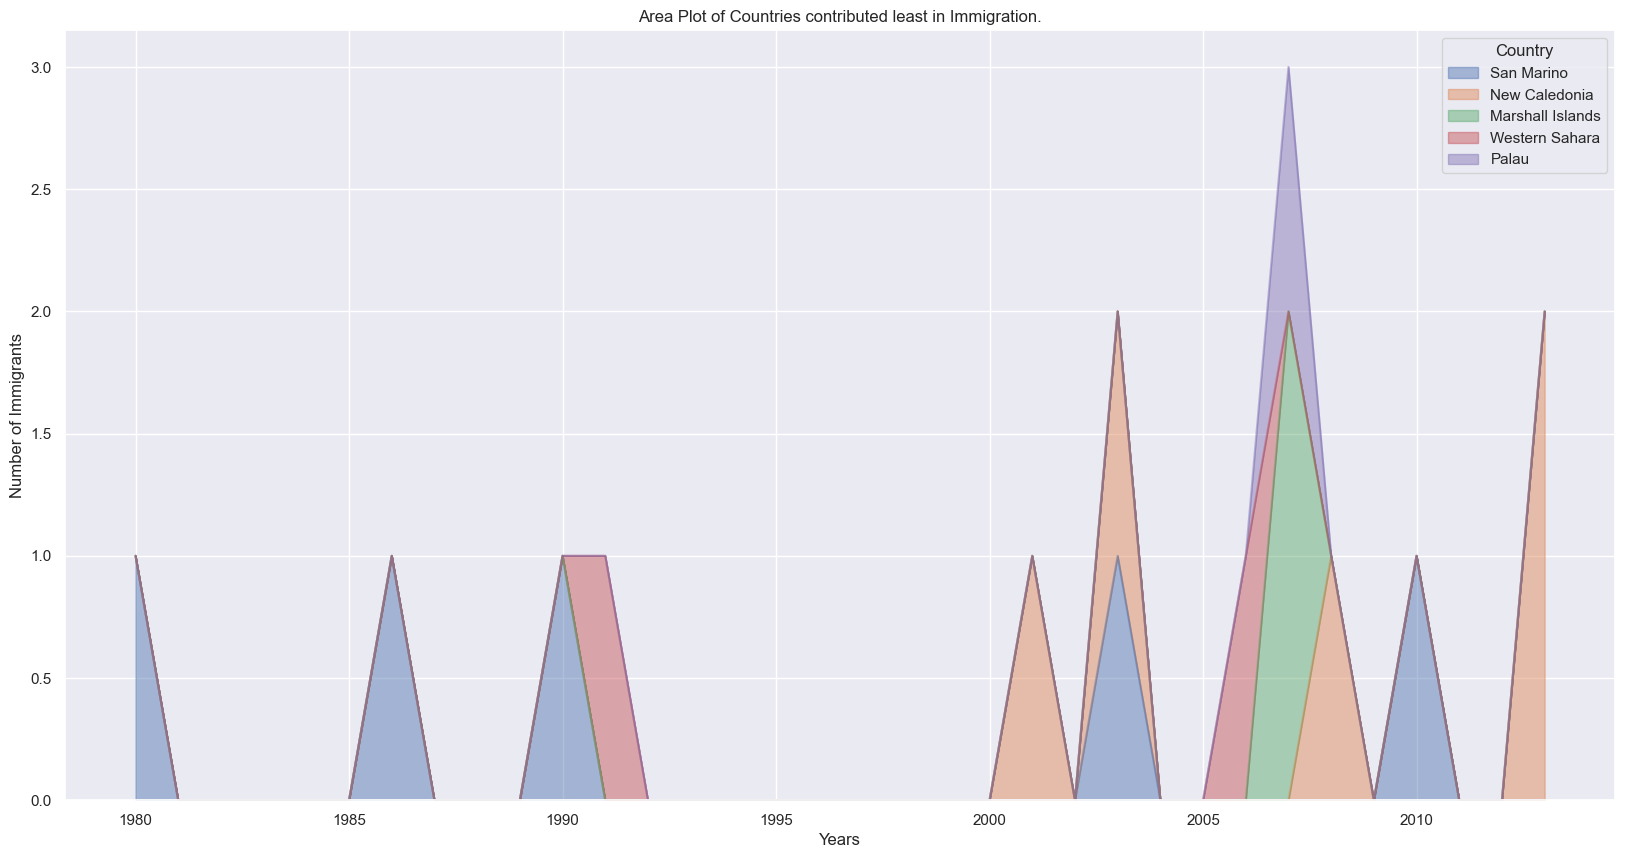

In [13]:
df_last_5.index = df_last_5.index.map(int)
ax =df_last_5.plot(kind ='area', alpha =0.45, figsize=(20,10))
ax.set_title("Area Plot of Countries contributed least in Immigration.")
ax.set_ylabel("Number of Immigrants")
ax.set_xlabel("Years")

# Histograms<a id="8"></a>

A histogram is a way of representing the *frequency* distribution of numeric dataset. The way it works is it partitions the x-axis into *bins*, assigns each data point in our dataset to a bin, and then counts the number of data points that have been assigned to each bin. So the y-axis is the frequency or the number of data points in each bin. Note that we can change the bin size and usually one needs to tweak it so that the distribution is displayed nicely.

Let's find out the frequency distribution of the number (population) of new immigrants from the various countries to Canada in 2013.


Before we proceed with creating the histogram plot, let's first examine the data split into intervals. To do this, we will us **Numpy**'s `histrogram` method to get the bin ranges and frequency counts as follows:


In [14]:
df['2013'].head()

Country
India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

In [15]:
# np.histogram returns 2 values
count , bin_edges = np.histogram(df['2013'])
print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


By default, the `histrogram` method breaks up the dataset into 10 bins. The details below summarizes the bin ranges and the frequency distribution of immigration in 2013. We can see that in 2013:

*   178 countries contributed between 0 to 3412.9 immigrants
*   11 countries contributed between 3412.9 to 6825.8 immigrants
*   1 country contributed between 6285.8 to 10238.7 immigrants, and so on..

Let's visualize the data by passing `kind=hist` to `plot()`.

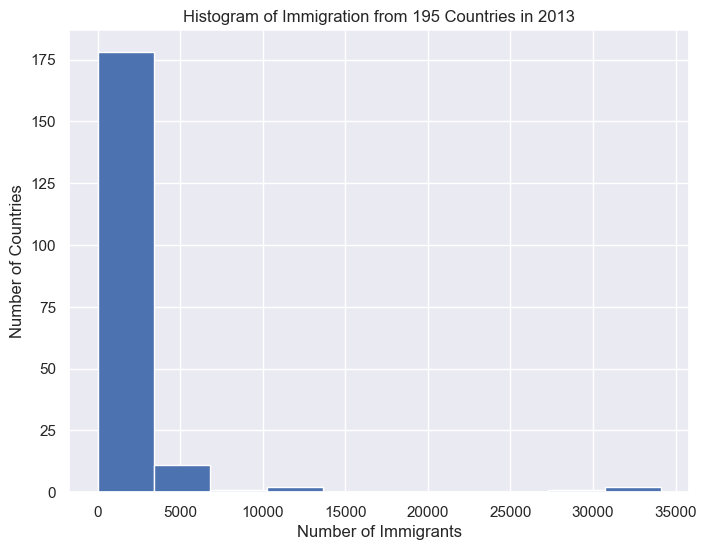

In [16]:
df['2013'].plot(kind ='hist', figsize =(8,6))

plt.title('Histogram of Immigration from 195 Countries in 2013')
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrants')

plt.show()

Notice that the x-axis labels do not match with the bin size. This can be fixed by passing in a `xticks` keyword that contains the list of the bin sizes, as follows:

Let's check the immigration for the year `2012`.

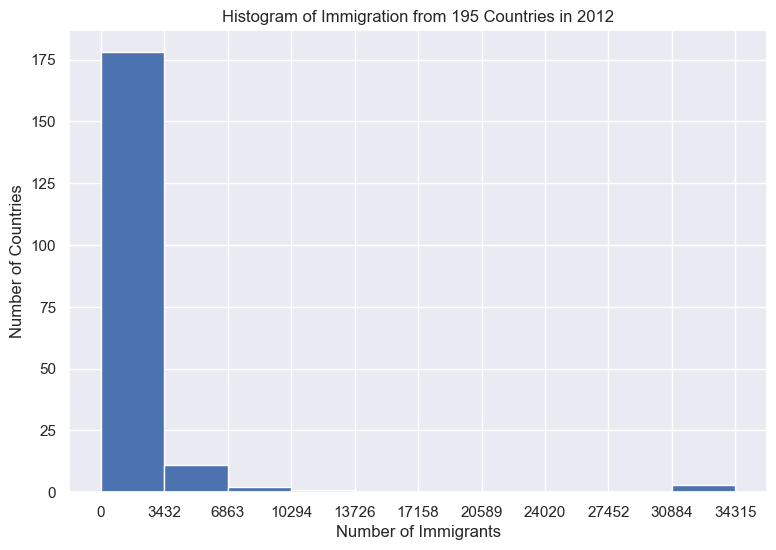

In [17]:
count, bin_edges = np.histogram(df['2012'])
df['2012'].plot(kind='hist', figsize =(9,6), xticks= bin_edges)

plt.title('Histogram of Immigration from 195 Countries in 2012')
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrants')

plt.show()

*Side Note:* We could use `df_can['2013'].plot.hist()`, instead. In fact, throughout this lesson, using `some_data.plot(kind='type_plot', ...)` is equivalent to `some_data.plot.type_plot(...)`. That is, passing the type of the plot as argument or method behaves the same.

We can also plot multiple histograms on the same plot. Let's find out the immigration distribution for `Denmark, Norway, and Sweden for years 1980 - 2013?`

In [18]:
df.loc[['Denmark', 'Sweden', 'Norway'], years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59


We need to transpose the country with years for plotting.

In [19]:
df_t = df.loc[['Denmark', 'Sweden', 'Norway'], years].transpose()
df_t.head()

Country,Denmark,Sweden,Norway
1980,272,281,116
1981,293,308,77
1982,299,222,106
1983,106,176,51
1984,93,128,31


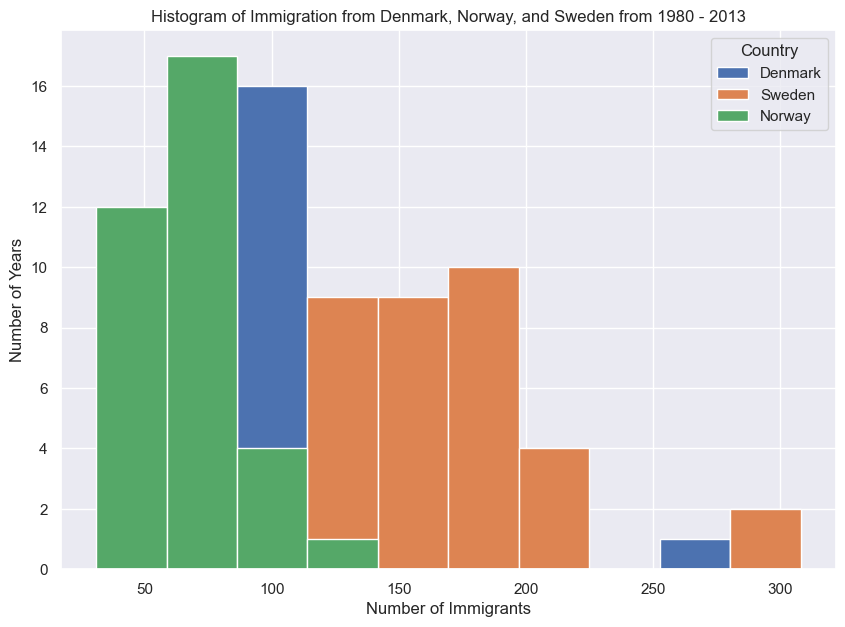

In [20]:
df_t.plot(kind ='hist', figsize=(10,7))

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

Let's make a few modifications to improve the impact and aesthetics of the previous plot:

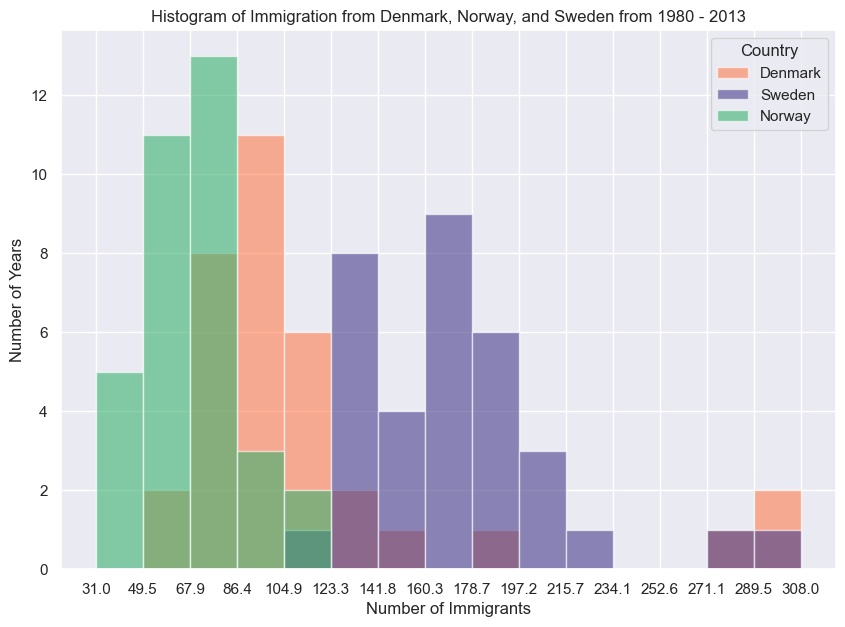

In [21]:
count, bin_edges = np.histogram(df_t, 15)

df_t.plot(kind ='hist',
          figsize = (10,7),
          alpha =0.6,
          xticks =bin_edges,
          bins =15,
          color = ['coral', 'darkslateblue','mediumseagreen'])

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

If we do not want the plots to overlap each other, we can stack them using the `stacked` parameter. Let's also adjust the min and max x-axis labels to remove the extra gap on the edges of the plot. We can pass a tuple (min,max) using the `xlim` paramater, as show below.

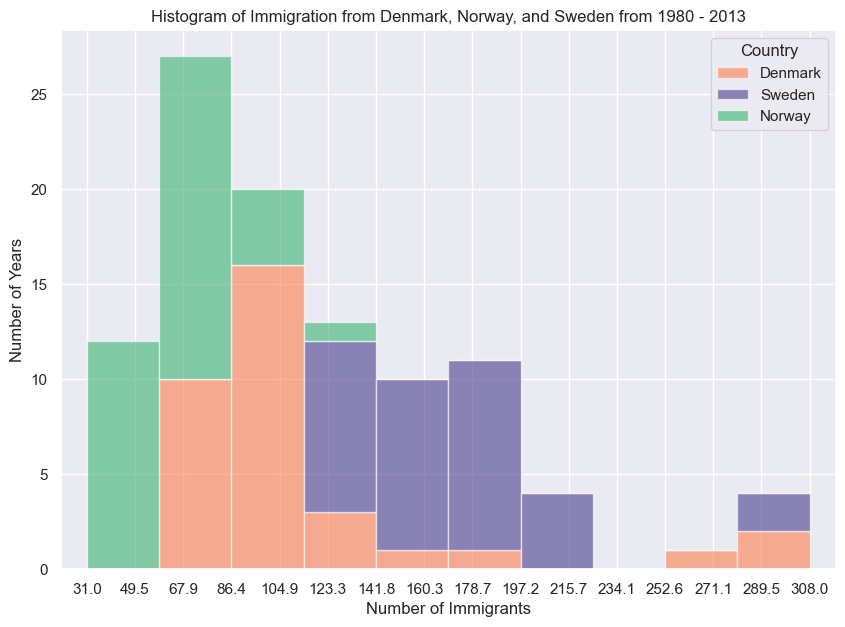

In [22]:
count, bin_edges = np.histogram(df_t, 15)

xmin = bin_edges[0] -10  # first bin value is 31.0, adding buffer of 10 for aesthetic purposes 
xmax = bin_edges[-1] +10 # last bin value is 308.0, adding buffer of 10 for aesthetic purposes

#stacked Histogram

df_t.plot(kind ='hist',
          figsize=(10,7),
          alpha =0.6,
          stacked =True,
          xticks= bin_edges,
          xlim =(xmin, xmax),
          color= ['coral', 'darkslateblue','mediumseagreen'])

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants') 

plt.show()

For a full listing of colors available in Matplotlib, run the following code in your python shell:


```python
import matplotlib
for name, hex in matplotlib.colors.cnames.items():
    print(name, hex)
```    

Now let's use the scripting layer to display the immigration distribution for Greece, Albania, and Bulgaria for years 1980 - 2013. Use an overlapping plot with 15 bins and a transparency value of 0.35.

In [23]:
df_gab = df.loc[['Greece', 'Albania', 'Bulgaria'], years].transpose()
df_gab.head()

Country,Greece,Albania,Bulgaria
1980,1065,1,24
1981,953,0,20
1982,897,0,12
1983,633,0,33
1984,580,0,11


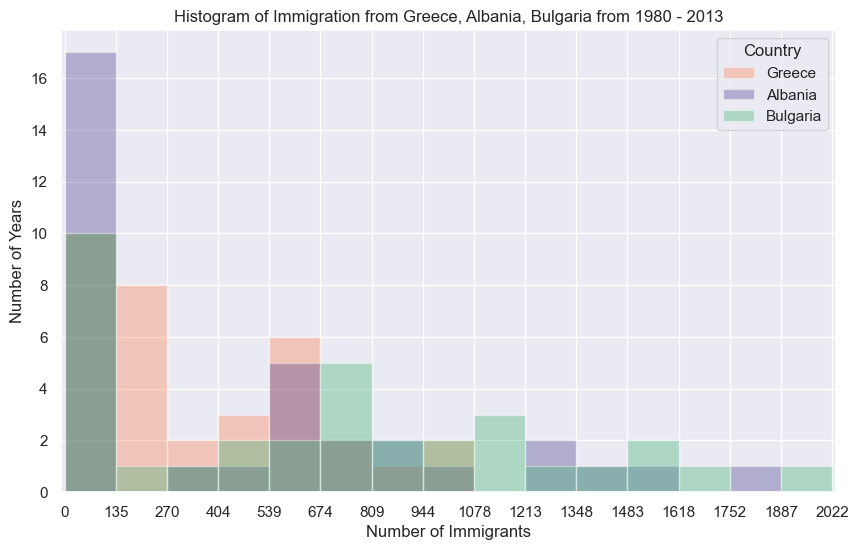

In [24]:
count, bin_edges = np.histogram(df_gab, 15)

xmin = bin_edges[0] -10
xmax = bin_edges[-1] +10

df_gab.plot(kind ='hist',
            figsize =(10,6),
            bins =15,
            alpha =0.35,
            xlim =(xmin, xmax),
            xticks=bin_edges,
            color = ['coral', 'darkslateblue', 'mediumseagreen'])

plt.title('Histogram of Immigration from Greece, Albania, Bulgaria from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants') 

plt.show()

## Bar Charts (Dataframe)


A bar plot is a way of representing data where the *length* of the bars represents the magnitude/size of the feature/variable. Bar graphs usually represent numerical and categorical variables grouped in intervals.

To create a bar plot, we can pass one of two arguments via `kind` parameter in `plot()`:

*   `kind=bar` creates a *vertical* bar plot
*   `kind=barh` creates a *horizontal* bar plot

### **Vertical bar plot**

In vertical bar graphs, the x-axis is used for labelling, and the length of bars on the y-axis corresponds to the magnitude of the variable being measured. `Vertical bar graphs are particularly useful in analyzing time series data.` **One disadvantage is that they lack space for text labelling at the foot of each bar.**

**Let's start off by analyzing the effect of Iceland's Financial Crisis:**

The 2008 - 2011 Icelandic Financial Crisis was a major economic and political event in Iceland. Relative to the size of its economy, Iceland's systemic banking collapse was the largest experienced by any country in economic history. The crisis led to a severe economic depression in 2008 - 2011 and significant political unrest.

Let's compare the number of Icelandic immigrants (country = 'Iceland') to Canada from year 1980 to 2013.

In [25]:
df_ice = df.loc['Iceland', years]
df_ice.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

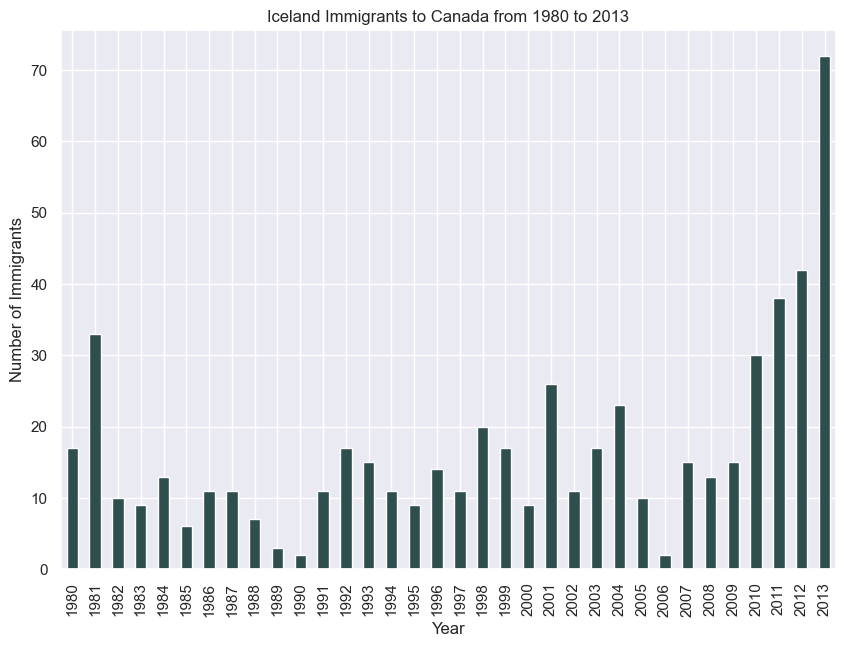

In [27]:
df_ice.plot(kind ='bar',
            figsize=(10,7),
            color ='Darkslategrey'
            )
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title("Iceland Immigrants to Canada from 1980 to 2013")

plt.show()

**We can clearly see the impact of the financial crisis; the number of immigrants to Canada started increasing rapidly after 2008.**

Let's annotate this on the plot using the `annotate` method of the **scripting layer** or the **pyplot interface**. We will pass in the following parameters:

*   `s`: str, the text of annotation.
*   `xy`: Tuple specifying the (x,y) point to annotate (in this case, end point of arrow).
*   `xytext`: Tuple specifying the (x,y) point to place the text (in this case, start point of arrow).
*   `xycoords`: The coordinate system that xy is given in - 'data' uses the coordinate system of the object being annotated (default).
*   `arrowprops`: Takes a dictionary of properties to draw the arrow:
    *   `arrowstyle`: Specifies the arrow style, `'->'` is standard arrow.
    *   `connectionstyle`: Specifies the connection type. `arc3` is a straight line.
    *   `color`: Specifies color of arrow.
    *   `lw`: Specifies the line width.

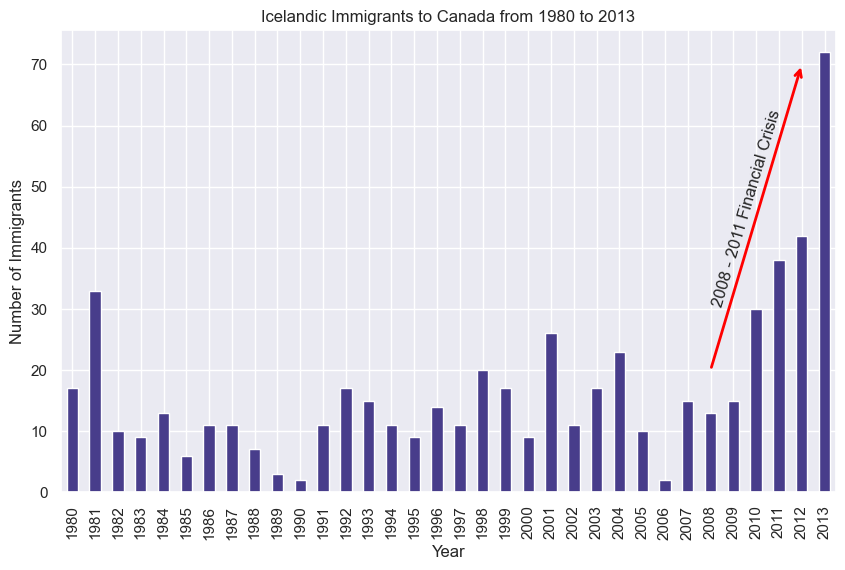

In [42]:
df_ice.plot(kind ='bar',
            figsize=(10,6),
            color ='Darkslateblue',
            rot =90 #rot 90 rotate the xticks(labelled points on x-axis) by 90 degrees
            )

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

#Annotate arrow
plt.annotate("", # s: str. will leave it blank for no text
             xy =(32,70), # place head of the arrow at point (year 2012, pop 70)
             xytext=(28,20), # place base of the arrow at point (year 2008 , pop 20)
             xycoords= 'data', # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle = '->', connectionstyle ='arc3', color ='red', lw =2)
             )

#Annotate Text
plt.annotate('2008 - 2011 Financial Crisis', #text to display
             xy =(28,30), # start the text at at point (year 2008 , pop 30)
             rotation =73.5, # based on trial and error to match the arrow
             va ='bottom', # want the text to be vertically 'bottom' aligned
             ha ='left') # want the text to be horizontally 'left' algned.
plt.show()

### **Horizontal Bar Plots**

Sometimes it is more practical to represent the data horizontally, especially if you need more room for labelling the bars. In horizontal bar graphs, the y-axis is used for labelling, and the length of bars on the x-axis corresponds to the magnitude of the variable being measured. As you will see, there is more room on the y-axis to  label categorical variables.

Let's create a *horizontal* bar plot showing the *total* number of immigrants to Canada from the top 15 countries, for the period 1980 - 2013. Label each country with the total immigrant count.

In [54]:
df.sort_values(by ='Total', ascending= True, axis =0, inplace =True)
df_top15 = df['Total'].tail(15)
df_top15

Country
Romania                                                  93585
Viet Nam                                                 97146
Jamaica                                                 106431
France                                                  109091
Lebanon                                                 115359
Poland                                                  139241
Republic of Korea                                       142581
Sri Lanka                                               148358
Iran (Islamic Republic of)                              175923
United States of America                                241122
Pakistan                                                241600
Philippines                                             511391
United Kingdom of Great Britain and Northern Ireland    551500
China                                                   659962
India                                                   691904
Name: Total, dtype: int64

Plot data:

1.  Use `kind='barh'` to generate a bar chart with horizontal bars.
2.  Make sure to choose a good size for the plot and to label your axes and to give the plot a title.
3.  Loop through the countries and annotate the immigrant population using the anotate function of the scripting interface.

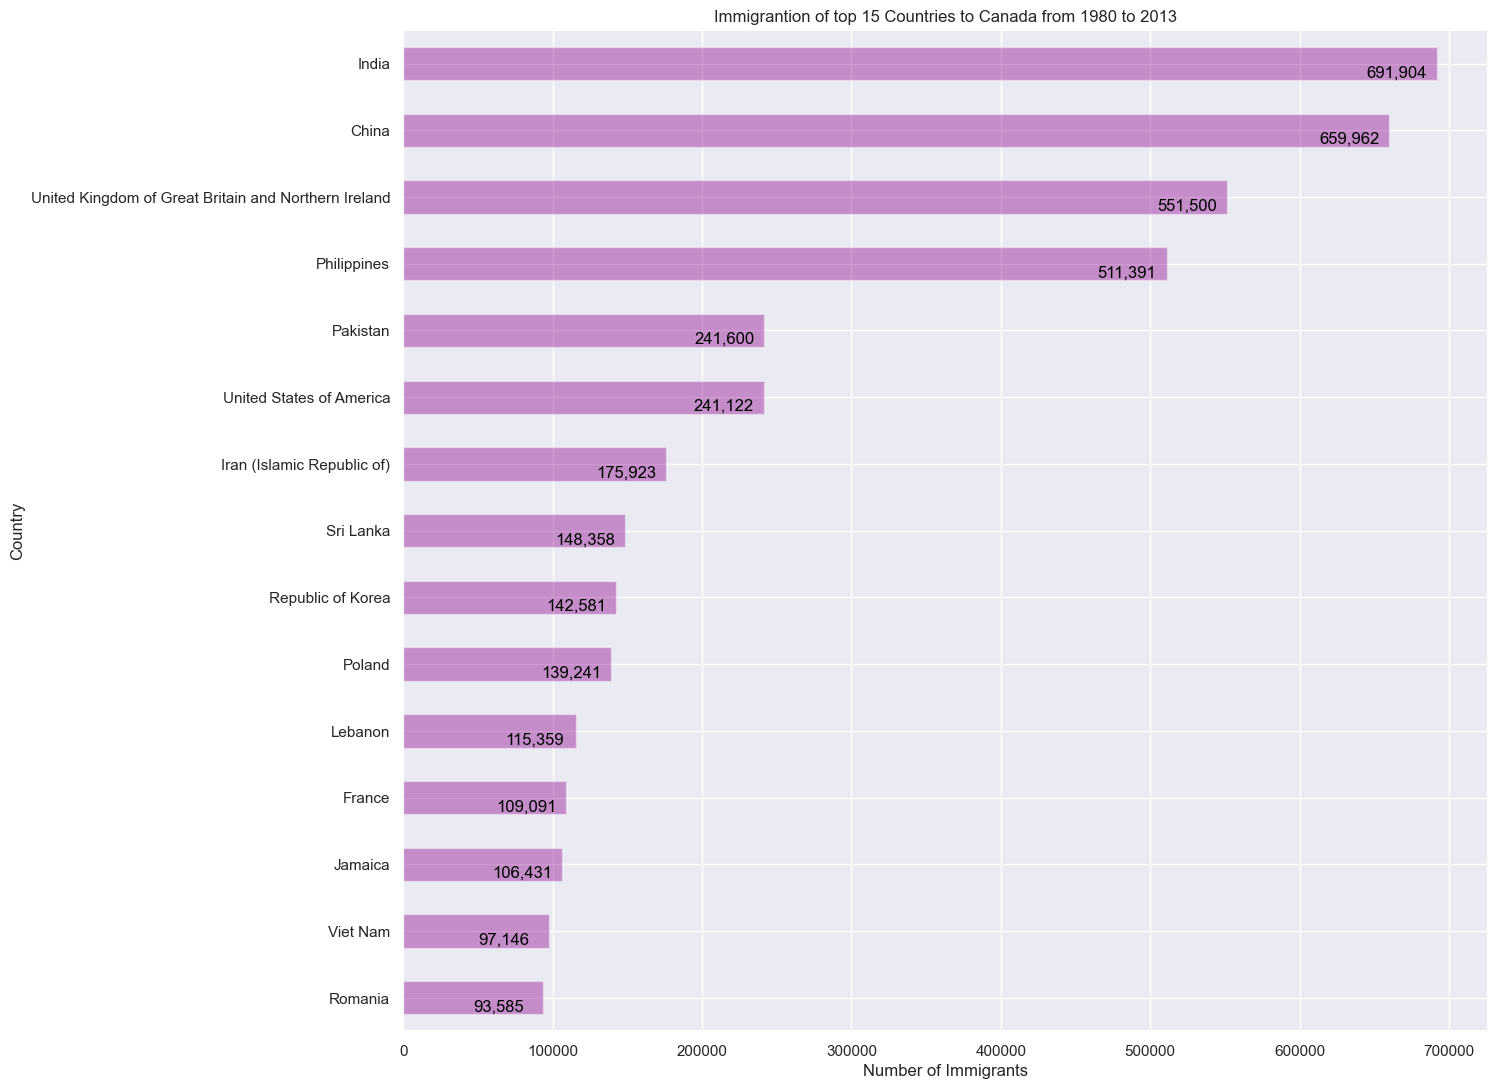

In [65]:
df_top15.plot(kind ='barh', figsize = (14,13), color ='darkmagenta', alpha =0.4)
plt.xlabel('Number of Immigrants')
plt.title('Immigrantion of top 15 Countries to Canada from 1980 to 2013')

# annotate value labels to each country
for index, value in enumerate(df_top15):
    label = format(int(value), ',') # format int with commas
    
#place text at the end of bar (substracting 47000 from x, and 0.1 from y to make it fit within the bar) 
    plt.annotate(label, xy =(value -47000, index -0.20), color ='black')

plt.show()    

### <h3 align="center"> Data Source © IBM Corporation 2020. <h3/>
### <h3 align="center"> Data Analysis and Visualization by LOVISH GARLANI. <h3/>